<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   invoice_no     99457 non-null  object 
 1   customer_id    99457 non-null  object 
 2   category       99457 non-null  object 
 3   quantity       99457 non-null  int64  
 4   price          99457 non-null  float64
 5   invoice_date   99457 non-null  object 
 6   shopping_mall  99457 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     99457 non-null  object 
 1   gender          99457 non-null  object 
 2   age             99338 non-null  float64
 3   payment_method  99457 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.0+ MB
<cla

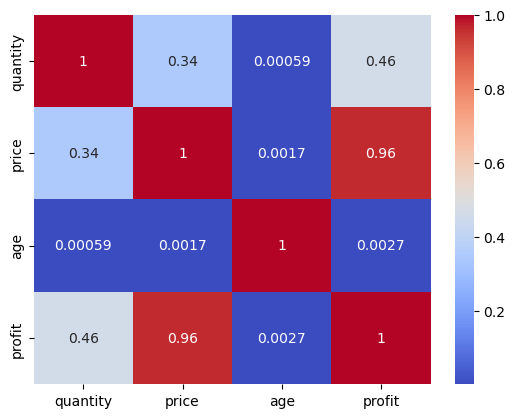

In [1]:
%run BLACKROCK_AUTOMATION.ipynb

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Generate date range
date_range = pd.date_range(start='2023-01-01', end='2023-06-30')

In [4]:
# Simulate sales data
np.random.seed(0)
sales_amount = np.random.randint(1000, 5000, size=len(date_range))
customer_ids = np.random.randint(1, 100, size=len(date_range))

In [5]:
# Create DataFrame
internal_sales_data = pd.DataFrame({
    'date': date_range,
    'sales_amount': sales_amount,
    'customer_id': customer_ids
})

In [6]:
internal_sales_data.to_csv("C:/Users/danus/OneDrive/Desktop/internal_sales_data.csv", index=False)

In [7]:
# Simulate market data
market_index = np.random.normal(100, 10, size=len(date_range))
economic_indicator = np.random.normal(50, 5, size=len(date_range))

In [8]:
#Create DataFrame
market_data = pd.DataFrame({
    'date': date_range,
    'market_index': market_index,
    'economic_indicator': economic_indicator
})

In [9]:
market_data.to_csv("C:/Users/danus/OneDrive/Desktop/market_data.csv", index=False)

In [10]:
internal_sales_data = load_data("C:/Users/danus/OneDrive/Desktop/internal_sales_data.csv")
market_data = load_data("C:/Users/danus/OneDrive/Desktop/market_data.csv")

In [11]:
internal_sales_data = clean_data(internal_sales_data)
market_data = clean_data(market_data)

In [12]:
internal_sales_data.head()

,date,sales_amount,customer_id
0,2023-01-01,3732,81
1,2023-01-02,3607,33
2,2023-01-03,2653,55
3,2023-01-04,4264,1
4,2023-01-05,1835,39


In [13]:
market_data.head()

,date,market_index,economic_indicator
0,2023-01-01,115.338357,55.877448
1,2023-01-02,107.647502,56.278295
2,2023-01-03,75.433210,48.595369
3,2023-01-04,82.963513,48.165412
4,2023-01-05,104.201531,58.268624


In [14]:
internal_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          181 non-null    object
 1   sales_amount  181 non-null    int64 
 2   customer_id   181 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.4+ KB


In [15]:
market_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                181 non-null    object 
 1   market_index        181 non-null    float64
 2   economic_indicator  181 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.4+ KB


In [16]:
#Convert date columns to datetime

internal_sales_data['date'] = pd.to_datetime(internal_sales_data['date'], dayfirst=True, utc=False, format='mixed')
market_data['date'] = pd.to_datetime(market_data['date'], dayfirst=True, utc=False, format='mixed')

In [17]:
internal_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          181 non-null    datetime64[ns]
 1   sales_amount  181 non-null    int64         
 2   customer_id   181 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.4 KB


In [18]:
market_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                181 non-null    datetime64[ns]
 1   market_index        181 non-null    float64       
 2   economic_indicator  181 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 4.4 KB


In [19]:
combined_data = pd.merge(internal_sales_data, market_data, on='date', how='inner')
print(combined_data.head())

        date  sales_amount  customer_id  market_index  economic_indicator
0 2023-01-01          3732           81    115.338357           55.877448
1 2023-01-02          3607           33    107.647502           56.278295
2 2023-01-03          2653           55     75.433210           48.595369
3 2023-01-04          4264            1     82.963513           48.165412
4 2023-01-05          1835           39    104.201531           58.268624


In [20]:
# Calculate correlation between sales amount and market index

correlation = combined_data['sales_amount'].corr(combined_data['market_index'])
print(f"Correlation between sales amount and market index: {correlation}")

Correlation between sales amount and market index: 0.02238822563051629


In [21]:
summary_stats = combined_data.describe()
print(summary_stats)

                      date  sales_amount  customer_id  market_index  \
count                  181    181.000000   181.000000    181.000000   
mean   2023-04-01 00:00:00   3048.922652    49.381215     99.504229   
min    2023-01-01 00:00:00   1084.000000     1.000000     68.221398   
25%    2023-02-15 00:00:00   2071.000000    27.000000     92.857838   
50%    2023-04-01 00:00:00   3135.000000    45.000000     99.922882   
75%    2023-05-16 00:00:00   3898.000000    74.000000    106.078417   
max    2023-06-30 00:00:00   4942.000000    99.000000    126.632276   
std                    NaN   1073.394110    28.172159     10.529779   

       economic_indicator  
count          181.000000  
mean            50.059353  
min             35.531900  
25%             46.563081  
50%             50.047392  
75%             54.001930  
max             64.063727  
std              5.499782  


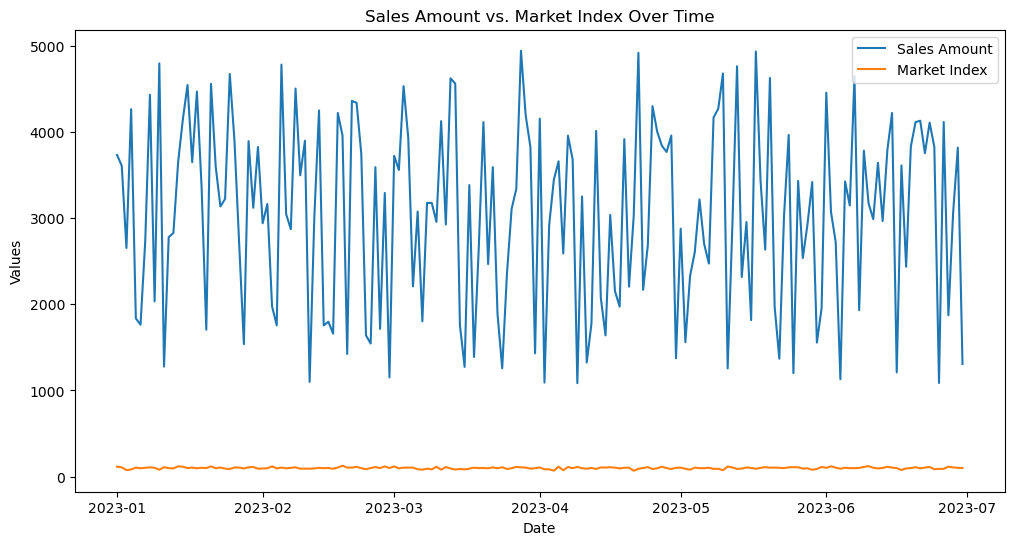

In [22]:
#Visualize sales and market index over time
plt.figure(figsize=(12,6))
sns.lineplot(x='date', y='sales_amount', data=combined_data, label='Sales Amount')
sns.lineplot(x='date', y='market_index', data=combined_data, label='Market Index')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Sales Amount vs. Market Index Over Time')
plt.legend()
plt.show()

In [23]:
combined_data.to_csv('combined_data_summary.csv', index=False)